In [95]:
import json
import numpy as np
node_dict = {}
with open("san_francisco_censustracts.json") as jsondata:
    d = json.load(jsondata)
    for feature in d["features"]:
#         if feature["properties"]["DISPLAY_NAME"] == "100 Campus Drive, Stanford":
#             stanford_nodes = feature["geometry"]["coordinates"]
#             print(feature["properties"]["MOVEMENT_ID"])
#         if feature["properties"]["DISPLAY_NAME"] == "700 Meder Street, Santa Cruz":
#             ucsc_nodes = feature["geometry"]["coordinates"]
#             print(feature["properties"]["MOVEMENT_ID"])
        data = feature["geometry"]["coordinates"][0][0]
        c1= []
        c2 = []
        for d in data:
            c1.append(d[0])
            c2.append(d[1])
        node_dict[int(feature["properties"]["MOVEMENT_ID"])] = [np.mean(c1), np.mean(c2)]

In [97]:
from scipy.spatial import Delaunay
import numpy as np
# print(node_dict.values())

In [98]:
# stanford_nodes = stanford_nodes[0][0]
# ucsc_nodes = ucsc_nodes[0][0]

# nodes = []
# for node in stanford_nodes:
#     nodes.append(node)
# for node in ucsc_nodes:
#     nodes.append(node)
points = np.array(list(node_dict.values()))

In [99]:
print(len(points))

2710


In [100]:
tri = Delaunay(points)

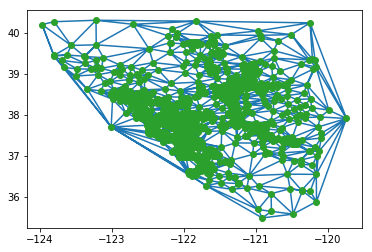

In [101]:
import matplotlib.pyplot as plt
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

In [119]:
print(tri.vertices[1])

[204 247 629]


In [120]:
edges = set() 
for n in range(tri.nsimplex): 
    edge = ([tri.vertices[n,0], tri.vertices[n,1]]) 
    if edge[0] in node_dict and edge[1] in node_dict:
        edges.add((edge[0], edge[1])) 
    edge = ([tri.vertices[n,0], tri.vertices[n,2]]) 
    if edge[0] in node_dict and edge[1] in node_dict:
        edges.add((edge[0], edge[1])) 
    edge = ([tri.vertices[n,1], tri.vertices[n,2]])     
    if edge[0] in node_dict and edge[1] in node_dict:
        edges.add((edge[0], edge[1])) 
# print(edges)

In [113]:
import csv
speed_dict = {}
with open('san_francisco_censustracts_2017_4_All_MonthlyAggregate.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    next(csvReader, None)
    for row in csvReader:
        if row[2] == "12":
            keypair = (int(row[0]), int(row[1]))
            if keypair in speed_dict:
                speed_dict[keypair].append(float(row[3]))
            speed_dict[keypair] = [float(row[3])]


In [114]:
for key, value in zip(speed_dict.keys(), speed_dict.values()):
    speed_dict[key] = np.mean(value)

In [121]:
traffic_flows = []
filtered_edges = []
filtered_points = []
for i in range(len(edges)):
    edge = list(edges)[i]
#     start = points[edge[0]]
#     end = points[edge[1]]
    start = node_dict[edge[0]]
    end = node_dict[edge[1]]
    key1 = (edge[0],edge[1])
    if key1 in speed_dict:
        filtered_edges.append(edge)
        filtered_points.append(node_dict[edge[0]])
        filtered_points.append(node_dict[edge[1]])
        road_len = np.sqrt(np.power(end[1] - end[0], 2) + np.power(start[1] - start[0], 2)) * 69.0
        speed = road_len/speed_dict[key1]
#         road_len = np.sqrt(np.power(end[1] - end[0], 2) + np.power(start[1] - start[0], 2)) * 69.0
    #     traffic_flow = 4*(road_len / (0.003 + (60 * 2)/3600.0))
        traffic_flow = speed * (1/(0.003 + (speed * 2)/3600.0))
        traffic_flows.append(traffic_flow)
        print("For road: ", i, " the traffic flow is: ", traffic_flow)



For road:  0  the traffic flow is:  1437.773543491922
For road:  3  the traffic flow is:  1060.5383858602736
For road:  11  the traffic flow is:  1508.4106899815529
For road:  16  the traffic flow is:  1342.9695511837106
For road:  18  the traffic flow is:  1480.3668818107674
For road:  23  the traffic flow is:  1395.5905921536191
For road:  29  the traffic flow is:  1341.7787576768596
For road:  30  the traffic flow is:  1692.5268597372012
For road:  35  the traffic flow is:  1528.6973578853958
For road:  39  the traffic flow is:  1469.0479275907207
For road:  41  the traffic flow is:  1305.021428275543
For road:  43  the traffic flow is:  1714.3152681386252
For road:  45  the traffic flow is:  1380.8439914577125
For road:  56  the traffic flow is:  1523.6696276415664
For road:  59  the traffic flow is:  1414.100630530296
For road:  60  the traffic flow is:  1411.0805722472942
For road:  72  the traffic flow is:  1374.948809866838
For road:  73  the traffic flow is:  1305.502695490838

For road:  900  the traffic flow is:  1643.105811390744
For road:  903  the traffic flow is:  1480.2072536462665
For road:  910  the traffic flow is:  1650.2226881881968
For road:  916  the traffic flow is:  1602.1861559919598
For road:  918  the traffic flow is:  1357.5122536276056
For road:  929  the traffic flow is:  1537.9204349708973
For road:  931  the traffic flow is:  1422.6391336899956
For road:  933  the traffic flow is:  1370.1589655746084
For road:  934  the traffic flow is:  1401.262706767152
For road:  940  the traffic flow is:  1499.2924772060394
For road:  944  the traffic flow is:  1742.4372034039618
For road:  946  the traffic flow is:  1690.8916643803827
For road:  950  the traffic flow is:  1406.7650119563457
For road:  952  the traffic flow is:  1571.3196294477611
For road:  955  the traffic flow is:  1422.7809570685774
For road:  964  the traffic flow is:  1258.3210210722852
For road:  969  the traffic flow is:  1012.757698298872
For road:  970  the traffic flow i

For road:  1563  the traffic flow is:  1369.2891567587285
For road:  1566  the traffic flow is:  1542.4124106616825
For road:  1568  the traffic flow is:  1456.0447385426228
For road:  1574  the traffic flow is:  1359.1267164729634
For road:  1587  the traffic flow is:  1376.82238355717
For road:  1589  the traffic flow is:  1306.584583574817
For road:  1598  the traffic flow is:  1490.802600428347
For road:  1599  the traffic flow is:  1575.1434711795157
For road:  1607  the traffic flow is:  1242.2744701765193
For road:  1608  the traffic flow is:  1676.2985798359607
For road:  1612  the traffic flow is:  1567.5177948458977
For road:  1613  the traffic flow is:  1680.5401355540855
For road:  1614  the traffic flow is:  1563.7574117458535
For road:  1616  the traffic flow is:  932.618091097513
For road:  1625  the traffic flow is:  1224.7957829320678
For road:  1632  the traffic flow is:  1428.3857757932174
For road:  1633  the traffic flow is:  1341.039026509967
For road:  1644  the 

For road:  2180  the traffic flow is:  1307.906008379002
For road:  2181  the traffic flow is:  1708.7409116551933
For road:  2182  the traffic flow is:  1379.0677475350237
For road:  2183  the traffic flow is:  1680.7958752677823
For road:  2186  the traffic flow is:  1327.4288624063904
For road:  2197  the traffic flow is:  1393.6833389016224
For road:  2207  the traffic flow is:  1113.724559830657
For road:  2210  the traffic flow is:  1453.5576734824247
For road:  2215  the traffic flow is:  1483.3833993382175
For road:  2223  the traffic flow is:  1224.6957302766089
For road:  2227  the traffic flow is:  1115.060037991331
For road:  2230  the traffic flow is:  1308.4114720524212
For road:  2232  the traffic flow is:  1685.9456415372756
For road:  2240  the traffic flow is:  1383.5571129216132
For road:  2248  the traffic flow is:  1643.3847454221536
For road:  2251  the traffic flow is:  1347.5558891534695
For road:  2253  the traffic flow is:  1242.505102532261
For road:  2255  t

For road:  3142  the traffic flow is:  1735.0010918715175
For road:  3145  the traffic flow is:  1257.7116626262116
For road:  3146  the traffic flow is:  1095.951044223494
For road:  3150  the traffic flow is:  1556.2922362994846
For road:  3153  the traffic flow is:  1721.8467767903041
For road:  3154  the traffic flow is:  1297.4988643361448
For road:  3156  the traffic flow is:  1412.1928720320832
For road:  3160  the traffic flow is:  1476.7014017294694
For road:  3161  the traffic flow is:  1757.6981299338547
For road:  3162  the traffic flow is:  1313.6547296872773
For road:  3163  the traffic flow is:  1125.7551617679321
For road:  3164  the traffic flow is:  1602.8126215393281
For road:  3165  the traffic flow is:  1598.8323959444695
For road:  3166  the traffic flow is:  932.066010007927
For road:  3172  the traffic flow is:  1389.9273909125911
For road:  3173  the traffic flow is:  1731.7659507660364
For road:  3178  the traffic flow is:  1081.8646943105673
For road:  3185  

For road:  3696  the traffic flow is:  1403.2403280600759
For road:  3700  the traffic flow is:  1644.1027802700512
For road:  3701  the traffic flow is:  1212.5438121086797
For road:  3710  the traffic flow is:  1479.514939994392
For road:  3712  the traffic flow is:  1654.5902511662134
For road:  3713  the traffic flow is:  1254.5052007541663
For road:  3723  the traffic flow is:  1573.5286226277267
For road:  3729  the traffic flow is:  1196.073010950547
For road:  3734  the traffic flow is:  1288.246521231456
For road:  3735  the traffic flow is:  1292.7191142189909
For road:  3736  the traffic flow is:  1400.6724102798132
For road:  3738  the traffic flow is:  1744.1902928433701
For road:  3744  the traffic flow is:  1475.9733967897992
For road:  3748  the traffic flow is:  1483.8840539260927
For road:  3752  the traffic flow is:  1305.6001502913011
For road:  3757  the traffic flow is:  1431.9235824113114
For road:  3760  the traffic flow is:  1538.1695592220794
For road:  3764  

For road:  4268  the traffic flow is:  1372.945915964584
For road:  4269  the traffic flow is:  1303.7627277642405
For road:  4270  the traffic flow is:  1123.6934177350336
For road:  4274  the traffic flow is:  1268.8817535341948
For road:  4282  the traffic flow is:  1735.8233620031565
For road:  4288  the traffic flow is:  1042.2901133640041
For road:  4290  the traffic flow is:  1627.6210388549564
For road:  4297  the traffic flow is:  1166.9782514541178
For road:  4299  the traffic flow is:  1238.903639993291
For road:  4309  the traffic flow is:  1581.22537571396
For road:  4311  the traffic flow is:  1375.0043789140514
For road:  4312  the traffic flow is:  1263.7030099732967
For road:  4313  the traffic flow is:  1332.7833455026941
For road:  4316  the traffic flow is:  1747.6495950895187
For road:  4317  the traffic flow is:  1571.0562494240385
For road:  4319  the traffic flow is:  1362.5889696429495
For road:  4321  the traffic flow is:  1615.8642112860973
For road:  4330  t

For road:  5036  the traffic flow is:  1254.6667253837816
For road:  5038  the traffic flow is:  1537.4526578610262
For road:  5039  the traffic flow is:  1309.3615226676243
For road:  5044  the traffic flow is:  1725.8258680037047
For road:  5047  the traffic flow is:  1356.5749825850867
For road:  5048  the traffic flow is:  1335.9179712804773
For road:  5049  the traffic flow is:  1143.436336786144
For road:  5050  the traffic flow is:  1537.5428499218121
For road:  5053  the traffic flow is:  1466.2597454966535
For road:  5059  the traffic flow is:  1376.5974158205784
For road:  5060  the traffic flow is:  1363.5147426717863
For road:  5065  the traffic flow is:  1344.1471774526547
For road:  5066  the traffic flow is:  1401.7593101443417
For road:  5068  the traffic flow is:  1522.1002917039727
For road:  5073  the traffic flow is:  1540.7791566619524
For road:  5075  the traffic flow is:  1576.4732002956446
For road:  5081  the traffic flow is:  1411.4020143785835
For road:  5082

For road:  5957  the traffic flow is:  1336.042255661841
For road:  5962  the traffic flow is:  1648.6504028318157
For road:  5965  the traffic flow is:  1047.0272776637548
For road:  5966  the traffic flow is:  1353.9475324716766
For road:  5972  the traffic flow is:  1635.813524859564
For road:  5975  the traffic flow is:  1222.0726768064128
For road:  5977  the traffic flow is:  1544.3232436872875
For road:  5978  the traffic flow is:  1372.0672661215146
For road:  5984  the traffic flow is:  1493.465116274928
For road:  5987  the traffic flow is:  1466.7944989806397
For road:  5989  the traffic flow is:  1245.984585706333
For road:  5990  the traffic flow is:  1431.4411998637386
For road:  6003  the traffic flow is:  1661.3093072227516
For road:  6005  the traffic flow is:  1727.8032366218101
For road:  6011  the traffic flow is:  1426.5077208360133
For road:  6013  the traffic flow is:  1301.7751163919831
For road:  6016  the traffic flow is:  1637.8345362073474
For road:  6017  t

For road:  6909  the traffic flow is:  1555.1203887868933
For road:  6914  the traffic flow is:  1327.4886122030425
For road:  6915  the traffic flow is:  1260.3750113302713
For road:  6922  the traffic flow is:  1286.944237753793
For road:  6924  the traffic flow is:  1615.7722382833567
For road:  6928  the traffic flow is:  1390.2968614830352
For road:  6935  the traffic flow is:  1522.6561932430122
For road:  6948  the traffic flow is:  1235.6650990630417
For road:  6956  the traffic flow is:  998.4338209938537
For road:  6957  the traffic flow is:  1749.4770703935144
For road:  6961  the traffic flow is:  1349.8097374209942
For road:  6962  the traffic flow is:  1261.2915248364031
For road:  6966  the traffic flow is:  1648.1669877549566
For road:  6969  the traffic flow is:  1278.4224424505653
For road:  6981  the traffic flow is:  1323.824025294619
For road:  6986  the traffic flow is:  1012.4584907680436
For road:  6989  the traffic flow is:  1095.1428389658163
For road:  6995  

For road:  7780  the traffic flow is:  1512.7861260287932
For road:  7791  the traffic flow is:  1093.3546466809041
For road:  7792  the traffic flow is:  1682.2962049954406
For road:  7802  the traffic flow is:  1156.7784167728303
For road:  7806  the traffic flow is:  1439.6928436812111
For road:  7808  the traffic flow is:  1426.0828616766876
For road:  7812  the traffic flow is:  1492.9940735363866
For road:  7816  the traffic flow is:  1375.455180680341
For road:  7821  the traffic flow is:  1372.714059877743
For road:  7824  the traffic flow is:  1701.920779616051
For road:  7830  the traffic flow is:  1402.215572377504
For road:  7835  the traffic flow is:  1275.1973696417956
For road:  7836  the traffic flow is:  1616.6873586653505
For road:  7837  the traffic flow is:  1204.0751611538221
For road:  7838  the traffic flow is:  1302.5854560717896
For road:  7842  the traffic flow is:  1319.9016437840153
For road:  7844  the traffic flow is:  1728.4946075568107
For road:  7846  t

For road:  8801  the traffic flow is:  1525.5500624104945
For road:  8803  the traffic flow is:  1346.6670106696993
For road:  8804  the traffic flow is:  1268.885839126783
For road:  8805  the traffic flow is:  1716.218283771098
For road:  8806  the traffic flow is:  1167.3553976363514
For road:  8809  the traffic flow is:  1246.8310411242094
For road:  8810  the traffic flow is:  1426.5899584660442
For road:  8814  the traffic flow is:  1615.8749781190463
For road:  8819  the traffic flow is:  1575.1463505835713
For road:  8827  the traffic flow is:  1486.6151642054735
For road:  8841  the traffic flow is:  1214.3973679401356
For road:  8846  the traffic flow is:  1519.7160197051048
For road:  8847  the traffic flow is:  1417.7175840738196
For road:  8849  the traffic flow is:  1349.8471206852264
For road:  8855  the traffic flow is:  1189.7918780125956
For road:  8864  the traffic flow is:  1608.465620315071
For road:  8868  the traffic flow is:  1189.4983927495314
For road:  8872  

For road:  9506  the traffic flow is:  1182.280032830829
For road:  9520  the traffic flow is:  1518.5280101129815
For road:  9521  the traffic flow is:  1279.0917566485448
For road:  9532  the traffic flow is:  1088.6421517527883
For road:  9534  the traffic flow is:  1226.9685674161465
For road:  9537  the traffic flow is:  1372.4299622331976
For road:  9543  the traffic flow is:  1407.6311307684166
For road:  9548  the traffic flow is:  1425.8362828164534
For road:  9551  the traffic flow is:  1318.6812864351907
For road:  9553  the traffic flow is:  1551.0323922009336
For road:  9561  the traffic flow is:  1588.964021593124
For road:  9566  the traffic flow is:  1273.4781632431886
For road:  9570  the traffic flow is:  1404.4829090785458
For road:  9571  the traffic flow is:  1234.002961454362
For road:  9572  the traffic flow is:  1648.9403388223402
For road:  9573  the traffic flow is:  1043.8903987200692
For road:  9574  the traffic flow is:  1473.148477998523
For road:  9576  t

For road:  10323  the traffic flow is:  1636.2351580767058
For road:  10335  the traffic flow is:  1473.4668291624232
For road:  10338  the traffic flow is:  1597.4982453854593
For road:  10341  the traffic flow is:  1704.213338436592
For road:  10345  the traffic flow is:  1261.5715960064279
For road:  10352  the traffic flow is:  1341.245220370111
For road:  10354  the traffic flow is:  1469.0200290597106
For road:  10381  the traffic flow is:  1307.3769003576253
For road:  10382  the traffic flow is:  1230.3912434899198
For road:  10388  the traffic flow is:  1072.0054728631533
For road:  10391  the traffic flow is:  1044.3150637440124
For road:  10393  the traffic flow is:  1103.5374964490775
For road:  10395  the traffic flow is:  1468.8364822086394
For road:  10398  the traffic flow is:  1399.0415226950504
For road:  10400  the traffic flow is:  1465.3333992584196
For road:  10401  the traffic flow is:  1322.5669142330821
For road:  10404  the traffic flow is:  1622.1609989687165

In [142]:
import networkx as nx 
graph1 = nx.Graph(list(edges)) 
graph2 = nx.Graph(list(filtered_edges)) 
# print(graph.edges()) 

# largest_g1 = max(nx.connected_component_subgraphs(graph1), key=len)
# graphs_1 = list(nx.connected_component_subgraphs(graph1))
# print(len(graphs_1))
# graphs_2 = list(nx.connected_component_subgraphs(graph2))
# print(len(graphs_2))
largest_g2 = max(nx.connected_component_subgraphs(graph2), key=len)

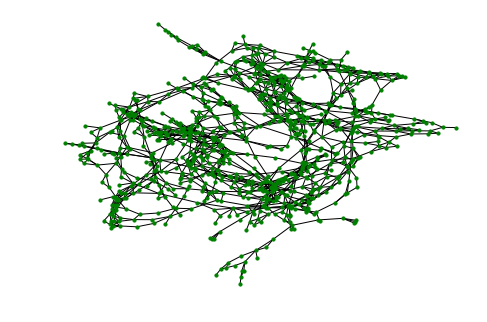

In [143]:
import matplotlib.pyplot as plt 
# pointIDXY = dict(zip(range(len(points)), points)) 
# pointIDXY = dict(zip(range(len(largest_g1.nodes)), largest_g1.nodes))
# nx.draw(graph1,node_size = 10, node_color = "blue") 
# plt.show() 

# pointIDXY = dict(zip(range(len(filtered_points)), filtered_points)) 
nx.draw(largest_g2,node_size = 10, node_color = "green") 
plt.show()

In [144]:
nx.set_edge_attributes(largest_g2, traffic_flows, 'traffic_flow')

In [145]:
print(len(edges))

10810
